#### https://www.codingfinance.com/post/2018-03-27-download-price/

In [31]:
library(tidyquant)
library(purrr)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:xts’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
options("getSymbols.warning4.0"=FALSE)
options("getSymbols.yahoo.warning"=FALSE)
# Downloading Apple price using quantmod

getSymbols("AAPL", from = '2022-01-01',
           to = "2022-03-01",warnings = FALSE,
           auto.assign = TRUE)

[1] "AAPL"

In [4]:
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2022-01-03    177.83    182.88   177.71     182.01   104487900      181.7784
2022-01-04    182.63    182.94   179.12     179.70    99310400      179.4713
2022-01-05    179.61    180.17   174.64     174.92    94537600      174.6974
2022-01-06    172.70    175.30   171.64     172.00    96904000      171.7811
2022-01-07    172.89    174.14   171.03     172.17    86709100      171.9509
2022-01-10    169.08    172.50   168.17     172.19   106765600      171.9709

In [5]:
class(AAPL)

[1] "xts" "zoo"

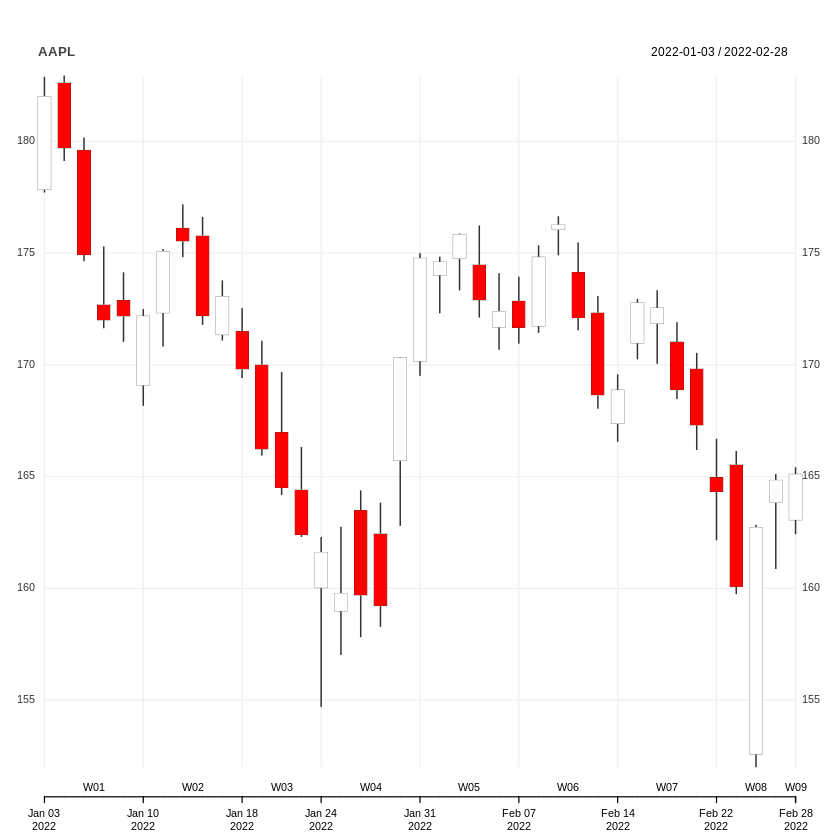

In [6]:
chart_Series(AAPL)

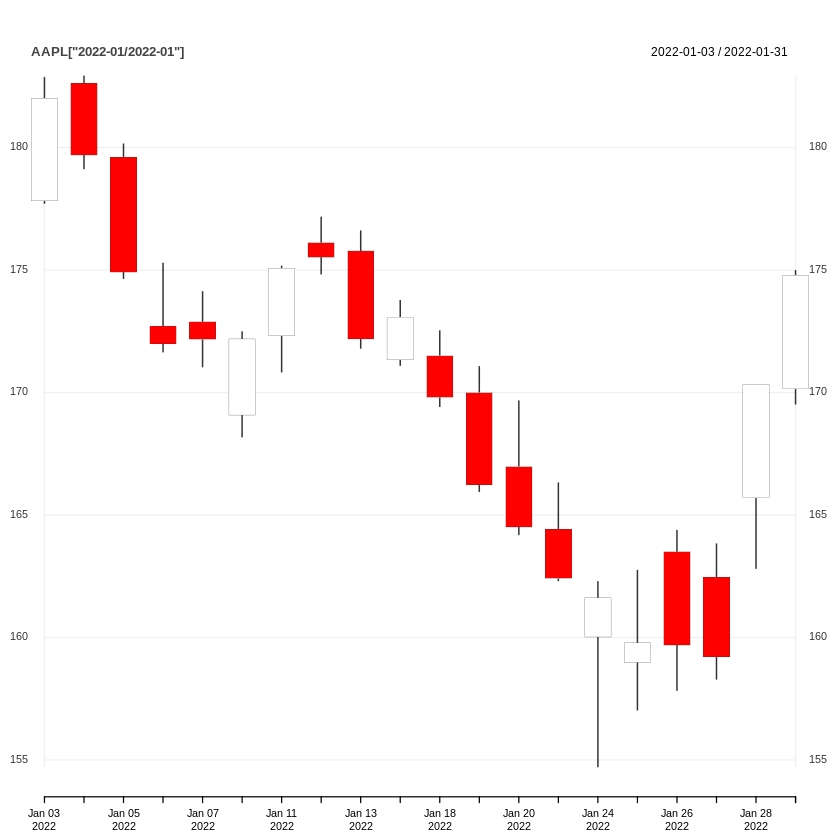

In [7]:
chart_Series(AAPL['2022-01/2022-01'])

In [8]:
tickers = c("AAPL", "NFLX", "AMZN", "K", "O")

getSymbols(tickers,
           from = "2022-01-01", #remove to = here ... is in the website but got issue
           to = "2022-01-15")

[1] "AAPL" "NFLX" "AMZN" "K"    "O"

In [14]:
prices <- map(tickers,function(x) Ad(get(x))) #map is from purrr
prices <- reduce(prices,merge)
colnames(prices) <- tickers

In [15]:
head(prices)

               AAPL   NFLX    AMZN        K        O
2022-01-03 181.7784 597.37 3408.09 64.10883 70.43952
2022-01-04 179.4713 591.15 3350.44 64.73327 71.47832
2022-01-05 174.6974 567.52 3287.14 65.09009 70.32081
2022-01-06 171.7811 553.29 3265.08 65.37753 70.64728
2022-01-07 171.9509 541.06 3251.08 66.01188 70.64728
2022-01-10 171.9709 539.85 3229.72 66.38853 70.86493

In [18]:
version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.2                         
year           2021                        
month          11                          
day            01                          
svn rev        81115                       
language       R                           
version.string R version 4.1.2 (2021-11-01)
nickname       Bird Hippie                 

In [17]:
class(prices)

[1] "xts" "zoo"

In [21]:
#remove the to= from website
aapl <- tq_get('AAPL',
               from = "2022-01-01",
               get = "stock.prices") 

In [22]:
head(aapl)

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2022-01-03,177.83,182.88,177.71,182.01,104487900,181.7784
AAPL,2022-01-04,182.63,182.94,179.12,179.70,99310400,179.4713
AAPL,2022-01-05,179.61,180.17,174.64,174.92,94537600,174.6974
AAPL,2022-01-06,172.70,175.30,171.64,172.00,96904000,171.7811
AAPL,2022-01-07,172.89,174.14,171.03,172.17,86709100,171.9509
AAPL,2022-01-10,169.08,172.50,168.17,172.19,106765600,171.9709


In [23]:
class(aapl)

[1] "tbl_df"     "tbl"        "data.frame"

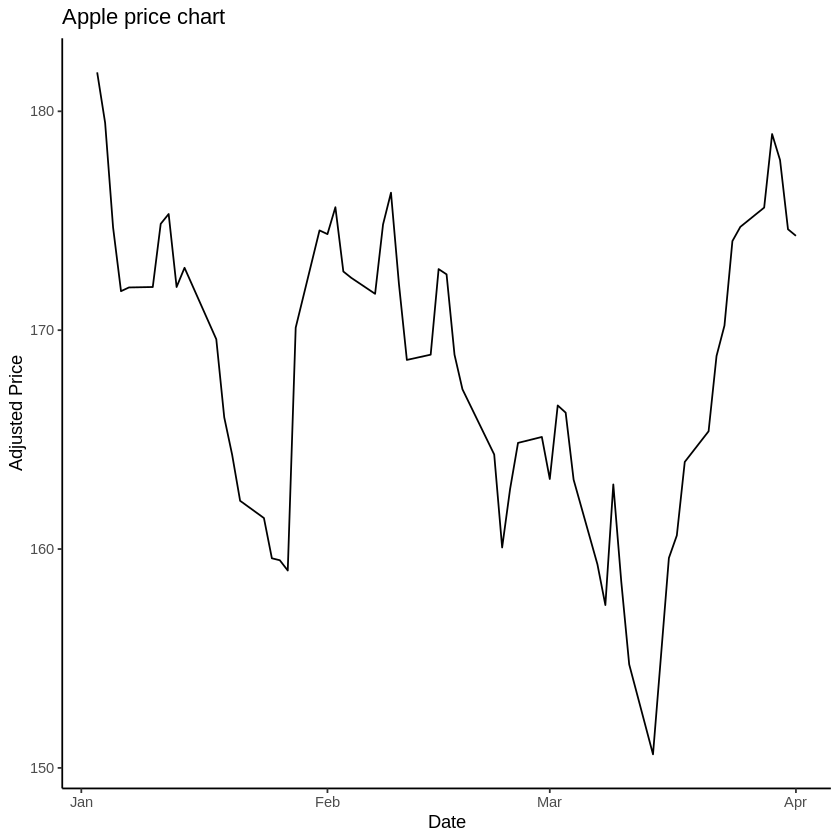

In [27]:
aapl %>%
  ggplot(aes(x = date, y = adjusted)) +
  geom_line() +
  theme_classic() +
  labs(x = 'Date',
       y = "Adjusted Price",
       title = "Apple price chart") +
  scale_y_continuous(breaks = seq(0,300,10))

In [28]:
tickers = c("AAPL", "NFLX", "AMZN", "K", "O")

prices <- tq_get(tickers,
                 from = "2022-01-01",
                 get = "stock.prices")

In [29]:
head(prices)

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2022-01-03,177.83,182.88,177.71,182.01,104487900,181.7784
AAPL,2022-01-04,182.63,182.94,179.12,179.70,99310400,179.4713
AAPL,2022-01-05,179.61,180.17,174.64,174.92,94537600,174.6974
AAPL,2022-01-06,172.70,175.30,171.64,172.00,96904000,171.7811
AAPL,2022-01-07,172.89,174.14,171.03,172.17,86709100,171.9509
AAPL,2022-01-10,169.08,172.50,168.17,172.19,106765600,171.9709


In [32]:
prices %>%
  group_by(symbol) %>%
  slice(1) #slice from dplyr

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2022-01-03,177.83,182.88,177.71,182.01,104487900,181.77840
AMZN,2022-01-03,3351.00,3414.07,3323.21,3408.09,3176000,3408.09009
K,2022-01-03,64.42,64.70,63.56,64.68,1664300,64.10883
NFLX,2022-01-03,605.61,609.99,590.56,597.37,3067500,597.37000
O,2022-01-03,71.73,71.81,70.10,71.20,3110500,70.43952


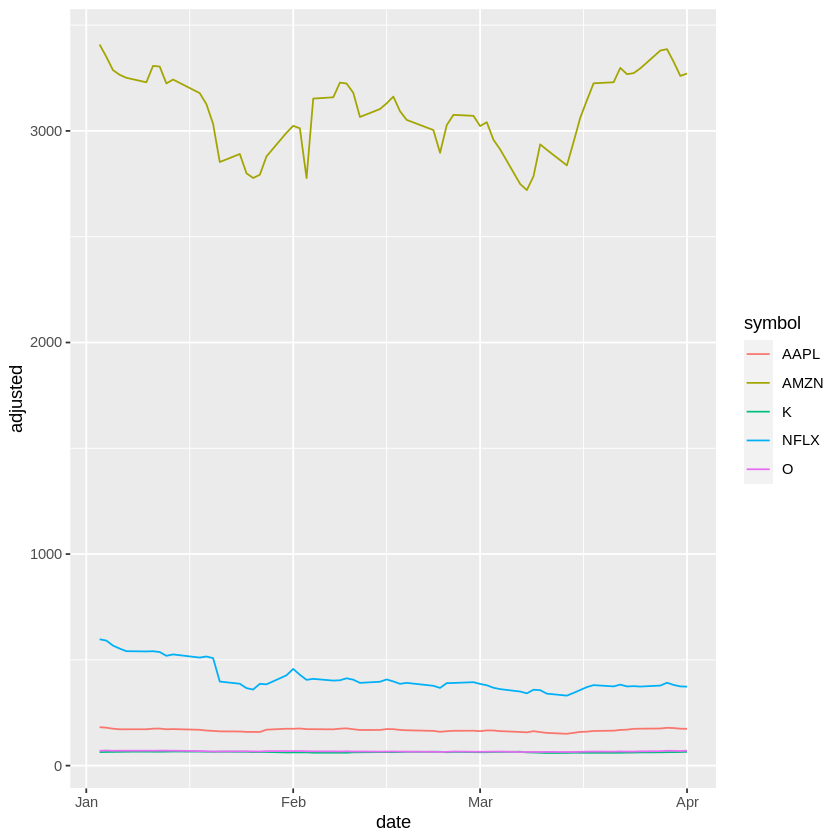

In [33]:
prices %>%
  ggplot(aes(x = date, y = adjusted, color = symbol)) +
  geom_line()

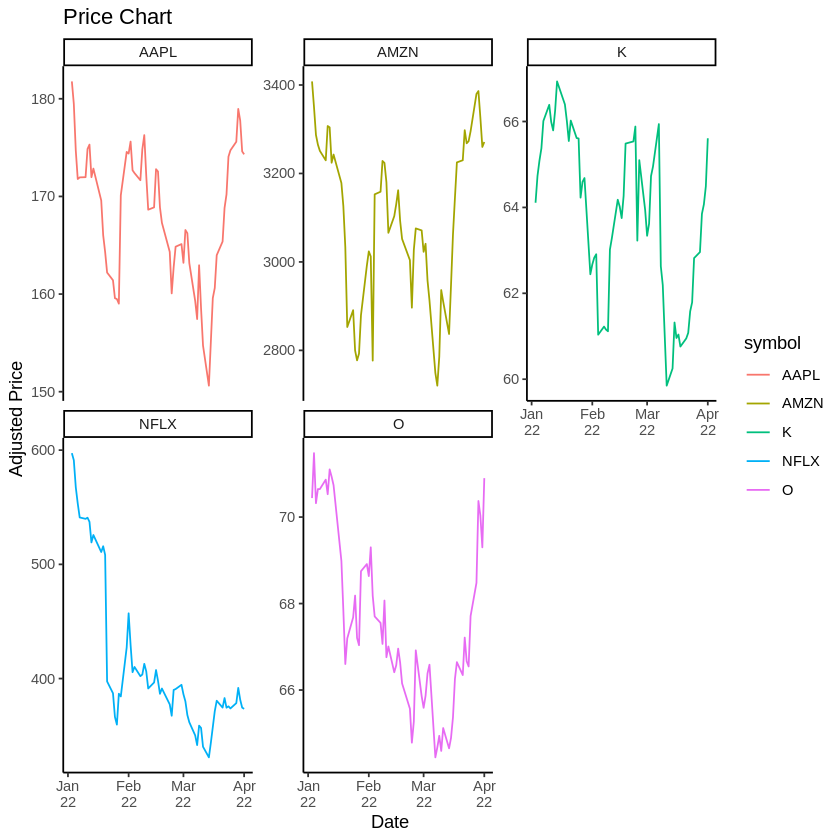

In [34]:
prices %>%
  ggplot(aes(x = date, y = adjusted, color = symbol)) +
  geom_line() +
  facet_wrap(~symbol,scales = 'free_y') +
  theme_classic() +
  labs(x = 'Date',
       y = "Adjusted Price",
       title = "Price Chart") +
  scale_x_date(date_breaks = "month",
               date_labels = "%b\n%y")